In [32]:
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

Pregunta 2

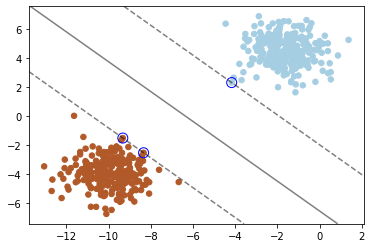

In [33]:
#crear el conjunto de datos aleatorio que sea linealmente separable
X, y = make_blobs(n_samples=500, centers=2, random_state=1)

# ajuste del kernel lineal
modelo_mvs = svm.SVC(kernel="linear", C=500)
modelo_mvs.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Funcion de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Matriz H (yiyjxixj) 
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
ZZ = modelo_mvs.decision_function(xy).reshape(XX.shape)

# el grafico de los límites y márgenes de decisión
ax.contour(
    XX, YY, ZZ, colors="black", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)

# Los vectores de soporte
ax.scatter(
    modelo_mvs.support_vectors_[:, 0],
    modelo_mvs.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="b",
)
plt.show()

Pregunta 4

Polinomio de grado 1


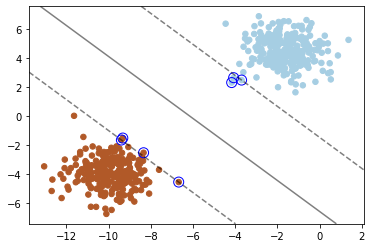

Polinomio de grado 2


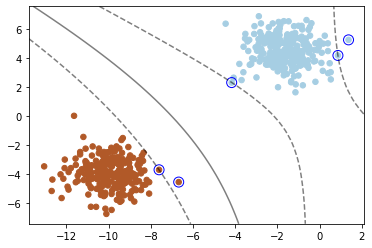

Polinomio de grado 3


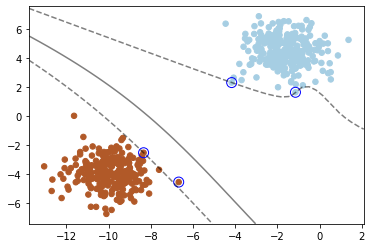

Polinomio de grado 4


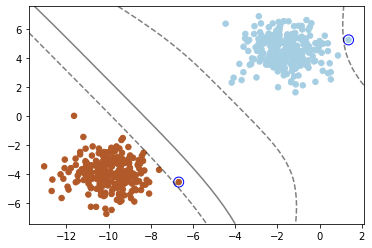

Polinomio de grado 5


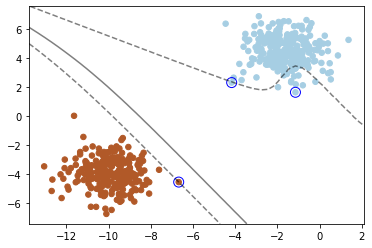

In [34]:
#creamos el conjunto de datos linealmente separable
X, y = make_blobs(n_samples=500, centers=2, random_state=1)

for i in range(1,6):
  # fit del modelo
  svm_poli = SVC(kernel='poly',  C=1, degree=i)
  svm_poli.fit(X, y)

  plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

  # La función de decisión
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # matriz H 
  xx = np.linspace(xlim[0], xlim[1], 50)
  yy = np.linspace(ylim[0], ylim[1], 50)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  ZZ = svm_poli.decision_function(xy).reshape(XX.shape)

  # el plot de los límites y márgenes de decisión
  ax.contour(
    XX, YY, ZZ, colors="black", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])


  # el plot de los vectores de soporte
  ax.scatter(
    svm_poli.support_vectors_[:, 0],
    svm_poli.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="blue",)
  print("Polinomio de grado", i)
  plt.show()

#from sklearn.svm import SVC
#classifier = SVC(kernel = 'poly',  )
#classifier.fit(X, y)

Cuando varia el parametro d, que es el grado del polinomio, se va de un kernel lineal hasta uno de grado 5. Tanto los vectores de soporte como el hiperplano separador se van curveando para ajustarse al nuevo grado del polinomio. Entre mayor sea d, más compleja es la separación que se realiza. Ya que es un conjutno linelmente separable, es un poco absurdo utilizar kernels polinomiales de grados mayores a 1. Esto muestra que al aumentar d, se aumenta la complejidad del modelo y se puede llegar al sobreajuste. 